# LSTM Model Implentation

In [2]:
"""
%pip install keras
%pip install tensorflow
%pip install seaborn
%pip install openpyxl

%pip install plotly""" 

Sequential: A linear stack of layers.
Dense: A fully connected layer.
Flatten: Converts multi-dimensional input into a single-dimensional array.

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px


ModuleNotFoundError: No module named 'plotly'

In [3]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [5]:
air_quailty = pd.read_csv("C:\\Users\\rushabh nakum\\Desktop\\Minor Project 7 sem\\data\\final_data.csv")

# Data preprocessing 

In [10]:
print(air_quailty.info())
print(air_quailty.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135513 entries, 0 to 135512
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        135513 non-null  object 
 1   Date        135513 non-null  object 
 2   PM2.5       135513 non-null  float64
 3   PM10        135513 non-null  float64
 4   NO          135513 non-null  float64
 5   NO2         135513 non-null  float64
 6   NOx         135513 non-null  float64
 7   NH3         135513 non-null  float64
 8   CO          135513 non-null  float64
 9   SO2         135513 non-null  float64
 10  O3          135513 non-null  float64
 11  Benzene     135513 non-null  float64
 12  Toluene     135513 non-null  float64
 13  Xylene      135513 non-null  float64
 14  AQI         135513 non-null  float64
 15  AQI_Bucket  135513 non-null  object 
dtypes: float64(13), object(3)
memory usage: 16.5+ MB
None
        City        Date   PM2.5    PM10    NO    NO2    NOx   NH3   CO  \

In [11]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [14]:
air_quailty = swap_columns(air_quailty,"Date","City")
air_quailty.head()

,Date,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,2017-11-25,Amaravati,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,117.62,0.30,10.40,0.23,155.0,Moderate
1,2017-11-25,Amaravati,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,136.23,0.28,7.10,0.15,159.0,Moderate
2,2017-11-25,Amaravati,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,149.92,0.20,4.55,0.08,173.0,Moderate
3,2017-11-25,Amaravati,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,161.70,0.10,2.30,0.00,191.0,Moderate
4,2017-11-25,Amaravati,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,161.68,0.10,2.35,0.00,191.0,Moderate


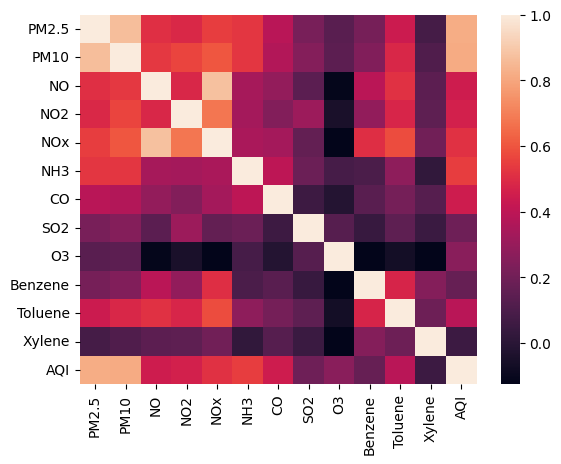

In [19]:
data_num = air_quailty.select_dtypes(include=['float64','int64'])
air_plot = sns.heatmap(data_num.corr())
plt.show()

In [ ]:
fig_1 = px.histogram(data,title = 'HistoGram of Pressure9am' , x = 'Pressure9am' ,marginal='box')
sns.displot(data=data, x='Pressure9am', kde=True)

fig_2_P9am.show()